
**Тренд**	Описывает чистое влияние долговременных факторов, изменяется плавно.
Пример: рост численности населения.

**Цикличность**	Состоит из циклов, меняющихся по длительности и амплитуде, описывает периоды подъёма и спада.
Пример: циклы в экономике, связанные с изменением спроса и предложения или с переменами в финансовой и налоговой политике.

**Сезонность**	Представляет собой последовательность почти повторяющихся циклов.
Пример: объёмы продаж цветов накануне 8 марта или авиабилетов в сезон отпусков летом.

**Шум (случайная компонента)**	Останется после вычитания всех вышеперечисленных компонентов. Не несёт никакого глубокого смысла.

ИНСТРУМЕНТЫ ДЛЯ ДЕКОМПОЗИЦИИ ВРЕМЕННОГО РЯДА

Разделить ряд на компоненты в Python можно с помощью библиотеки statsmodels. Если вы не устанавливали её ранее, это можно сделать стандартным способом (pip install statsmodels) или следуя рекомендациям в официальной документации.

В этом датасете представлены данные о количестве авиапассажиров в 1949-1960 годах. Рассмотрим некоторый временной ряд df из данного датасета.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/egor/Documents/data_science_course/SKILLFACTORY/MATH&ML-12. Временные ряды. Часть I/data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])

Теперь рассмотрим код, в котором демонстрируется, как применять декомпозицию к временному ряду df.

Декомпозиция выполняется методом seasonal_decompose(), который принимает на вход временной ряд с одним признаком. Индексом ряда должна быть дата или время. Именно поэтому, считывая датасет, мы указываем индексом столбец month и приводим его к формату даты. Также, если вы знаете, что в вашем временном ряду присутствует период, его вы также можете передать в качестве параметра в seasonal_decompose(). Более подробно о необязательных параметрах можно узнать в документации.

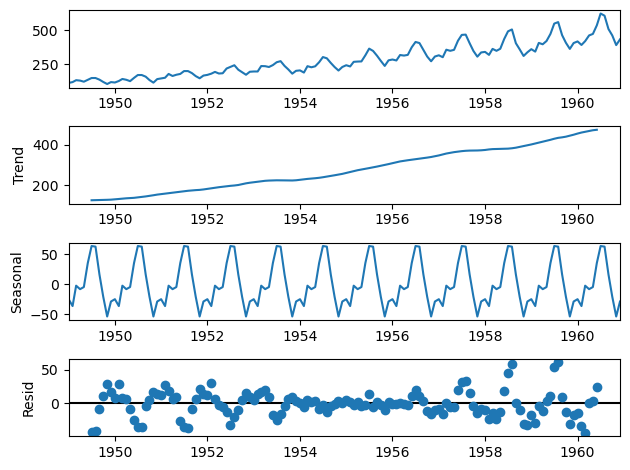

In [3]:
#импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
#производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

Одним из интересных способов анализа временного ряда является экспоненциальное сглаживание. Давайте разберёмся, что это такое и чем оно отличается от других методов прогнозирования.

Экспоненциальное сглаживание — это метод прогнозирования временных рядов для одномерных данных с трендом или сезонным компонентом. Оно также известно как метод простого экспоненциального сглаживания, или метод Брауна.

Обратите внимание, что формулу необязательно заучивать: главное — чтобы вы понимали принцип работы алгоритма.

В случае с этой формулой каждый новый элемент временного ряда рассчитывается от предыдущего и от сглаженного исходного.

Рассмотрим пример.

Нам известны значения температуры за прошедший месяц, и мы хотим предсказать погоду на следующий день. Мы можем предположить, что в этом случае погода завтра в большей степени будет зависеть от погоды вчера и сегодня, чем от погоды 30 дней назад. Если мы хотим учитывать удалённость значений от текущего момента, то экспоненциальное сглаживание пригодится тут как нельзя кстати.

Проще говоря, под экспоненциальным сглаживанием понимается взвешенная линейная сумма наблюдений, при этом веса для наблюдений экспоненциально уменьшаются для более старых наблюдений. Тем самым мы не обращаем особого внимания на поведение в прошлом, а недавнему поведению присваиваем больший вес. Если быть точнее, наблюдения взвешиваются с геометрически уменьшающимся коэффициентом.

In [4]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      18.5     23.05    27.915   25.8745  26.66235]


Так как по формуле значение для следующего дня рассчитывается от значения для текущего, мы можем продолжить получать следующие значения для экспоненциально сглаженного ряда, таким образом совершая прогноз (день за днём). В нашем примере для шестого дня мы получили прогнозируемое значение температуры в 26.6 градусов (26.66235, если быть точнее):


Коэффициент экспоненциального сглаживания подбирается интуитивно. Чем выше коэффициент, тем меньше внимания мы обращаем на старые данные. Если коэффициент близок к 0, данным в далёком прошлом будет уделено больше внимания. Так, при коэффициенте, равном 0.1, значения экспоненциально сглаженного ряда будут выглядеть так (сравните с предыдущим графиком):


В примере выше сглаженный ряд мы рассчитывали «вручную» по формуле, но делать это каждый раз нет необходимости, так как эта возможность уже встроена в библиотеку statsmodels. Для совершения предсказания методом простого экспоненциального сглаживания воспользуемся методом SimpleExpSmoothing из statsmodels.tsa.api.

Попробуйте запустить код ниже:

In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


СТАТИСТИЧЕСКИЕ ТЕСТЫ НА PYTHON

Одним из наиболее распространённых тестов на проверку временного ряда на стационарность является расширенный тест Дики — Фуллера. В тесте формулируется две гипотезы:

нулевая гипотеза (H0): временной ряд нестационарный, то есть имеет некоторый тренд и сезонную компоненту;
альтернативная гипотеза (H1): временной ряд стационарный, то есть не имеет тренда и сезонной компоненты, и данные скорее случайны.
В результате проведения теста мы получим несколько значений: значение статистики из теста и критические значения разных уровней значимости (1 %, 2 %, 3 %). Уровень значимости означает допустимую  для данной задачи вероятность ошибки, то есть чем ниже уровень значимости, тем ниже вероятность ошибочного результата теста.

Если значение статистики ниже критического значения выбранного уровня значимости, отвергаем гипотезу H0 и принимаем гипотезу H1 (ряд стационарный).
Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).
Рассмотрим пример проведения теста Дики — Фуллера на данных временного ряда Daily Total Female Births. В данных содержится количественная информация о девочках, рождённых за несколько месяцев. Для проведения теста будем использовать функцию adfuller() из пакета statsmodels.

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"/Users/egor/Documents/data_science_course/SKILLFACTORY/MATH&ML-12. Временные ряды. Часть I/data/daily-total-female-births.csv", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559767
p-value: 5.243412990149787e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


ЧТО ДЕЛАТЬ, ЕСЛИ РЯД НЕСТАЦИОНАРНЫЙ?

Если тест на стационарность показал, что ряд нестационарный и в нём присутствуют тренд и сезонность, необходимо избавиться от них.

Обычно для этого достаточно взять разность рядов. Разность выполняется путём дифференцирования ряда, для этого вычисляется разность между двумя соседними наблюдениями ряда. Если полученная первая разность ряда окажется стационарной, то этот ряд называется интегрированным рядом первого порядка.

Для определения порядка интегрированного ряда необходимо сделать следующее:

Получить новый ряд посредством взятия разности (применяем к необходимому датафрейму):
df_diff_1 = df.diff().dropna()
Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')
Если полученный ряд нестационарен, можно провести эту процедуру ещё раз, то есть ещё раз дифференцировать разность ряда, полученную на предыдущем этапе.

Если после двукратного дифференцирования результат окажется стационарным временным рядом, то исходный временной ряд будет называться интегрированным рядом второго порядка, и так далее.

Раньше вы уже встречались с понятием «корреляция».

Корреляция — это статистическая взаимосвязь, присутствующая между двумя и более величинами, то есть некоторая линейная зависимость (например, между признаками).

Что же такое автокорреляция временного ряда?

Автокорреляция — это статистическая взаимосвязь между последовательностями значений одного временного ряда, взятыми со сдвигом. Другими словами, автокорреляция говорит нам о том, насколько значение во временном ряду похоже на предыдущее значение.

Таким образом, автокорреляция — это корреляция ряда с самим собой (отсюда приставка «авто»), но со сдвигом во времени. Она помогает выявлять тенденции в данных и оценивать влияние ранее наблюдаемых значений на текущее наблюдение.

У автокорреляции много применений, но в первую очередь её используют для обработки сигналов, прогнозирования погоды и анализа рынка ценных бумаг. Иногда автокорреляция позволяет обнаружить скрытые тенденции.

Научиться находить автокорреляцию в Python довольно просто — далее мы разберём, когда и как можно применять эту функцию, а когда она может оказаться неэффективной. Но сначала рассмотрим несколько определений — чтобы построить график автокорреляции на Python, необязательно знать эти термины, однако их понимание позволит вам значительно лучше интерпретировать результаты.

Лаг — это предыдущее наблюдение (например, лаг в шесть дней относительно сегодняшнего дня указывает на значение чего-либо, полученное шесть дней назад).
Положительная корреляция — это отношение, при котором увеличение одного значения предсказывает увеличение другого.
Отрицательная корреляция — это отношение, при котором увеличение одного значения предсказывает уменьшение другого.
Доверительный интервал — это рассчитанный диапазон значений, в котором, вероятно, будет содержаться неизвестное (предсказанное) значение для наших данных.
Уровень достоверности — это вероятность того, что доверительный интервал будет содержать наблюдаемое значение (фактическое значение для предсказания).

График автокорреляций разного порядка называется коррелограмма. Его довольно просто построить с помощью метода plot_acf из пакета statsmodels.graphics.tsaplots. Методу необходимо передать всё тот же временной ряд с индексом-датой.

Воспользуемся датасетом из примера сезонной декомпозиции, в котором представлены данные о количестве авиапассажиров в 1949–1960 годах.

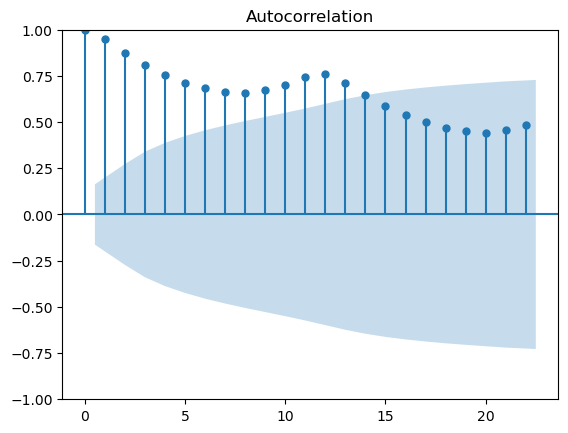

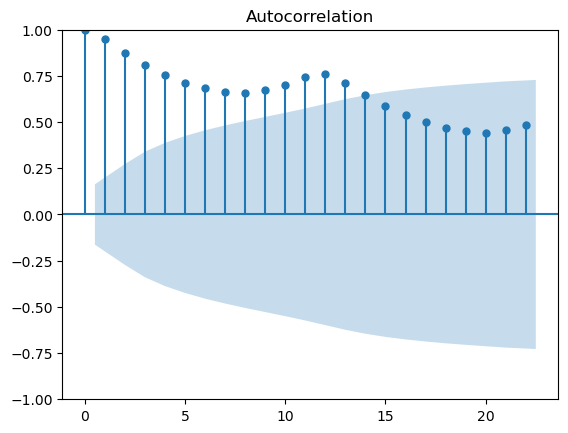

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("/Users/egor/Documents/data_science_course/SKILLFACTORY/MATH&ML-12. Временные ряды. Часть I/data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
plot_acf(df)

На оси х коррелограммы расположен лаг (порядок), при котором вычисляется автокорреляция. Ось y показывает значение корреляции (от -1 до 1). Чем ближе значение корреляции к 1 или -1, тем выше зависимость, например:

пик при лаге, равном 1, показывает сильную зависимость между значениям ряда и предыдущим значением;
пик при лаге, равном 2, показывает сильную корреляцию между каждым значением и значением в более ранний момент на расстоянии 2 от данного.
Также можно встретить коррелограммы, похожие на гистограммы, но их смысл от этого не меняется.

Для совершения предсказаний по данным временного ряда статистическими моделями, необходимо, чтобы во временном ряду присутствовала зависимость, а коррелограмма — хороший способ визуально определить наличие такой зависимости. Значения на коррелограмме будут близки к 0 в случае, если данные ряда не зависят от себя в прошлом. Если скрытая зависимость всё-таки имеется, то одно или несколько значений будут значительно отличаться.

КАК ЧИТАТЬ КОРРЕЛОГРАММУ?


Если максимальное значение коррелограммы (не считая значения в нуле) оказывается выраженным для лага, равного  (на рисунке выше , то временной ряд содержит циклическую компоненту с периодом . То есть данные являются зависимыми/схожими с данными, находящимися на расстоянии  дней/недель и т. д.


Если максимальное значение на коррелограмме находится в , то ряд содержит только тенденцию (тренд).


А если все значения на графике автокорреляции колеблются в районе , то ряд не содержит циклической компоненты и тренда либо содержит нелинейный тренд, который не видно на коррелограмме (так как нелинейный тренд не может быть выражен линейным коэффициентом корреляции).

ЧАСТИЧНАЯ АВТОКОРРЕЛЯЦИЯ

Для определения сезонного периода используется частичная автокорреляция. Она похожа на классическую автокорреляцию, однако дополнительно избавляется от линейной зависимости между сдвинутыми рядами. График частичной автокорреляции читается так же, как и коррелограмма.

Частичная автокорреляция строится с помощью метода plot_pacf из пакета statsmodels.graphics.tsaplots.

Если вы хотите узнать больше про частичную автокорреляцию, рекомендуем обратиться к этой статье (перевод её основной части на русский язык).

АВТОКОРРЕЛЯЦИЯ ОСТАТКОВ

Помимо анализа временного ряда на наличие или отсутствие взаимозависимости, иногда смотрят автокорреляцию остатков модели. В хорошей модели остатки (ошибки) должны иметь случайный характер — это означает, что модель уловила все существующие зависимости.

Рассмотрим, как определять автокорреляцию остатков по графикам остатков (ошибок предсказания):



На графике выше в большинстве случаев после положительных остатков следуют положительные, а после отрицательных — отрицательные. Это пример положительной автокорреляции.


А в этом случае после положительных остатков чаще всего следуют отрицательные и наоборот, на графике — отрицательная автокорреляция.

ПРИЧИНЫ АВТОКОРРЕЛЯЦИИ ОСТАТКОВ:

Если в остатках имеется автокорреляция (наличие зависимости), это значит, что какая-то зависимость осталась незамеченной для вашей модели — возможно, какие-то важные признаки не были учтены.
На появление автокорреляции в остатках может повлиять предварительное сглаживание данных, так как вы искусственно сглаживаете значения (накладывая соседние друг на друга, добавляя зависимость).
Остатки будут случайными, если автокорреляции нет. Статистически, а не только визуально проверить её наличие или отсутствие можно с помощью теста Дарбина — Уотсона. Пример применения теста на автокорреляцию остатков приведён в статье.

Авторегрессионная модель — это модель временных рядов, которая описывает, как прошлые значения временного ряда влияют на его текущее значение. Как можно понять из значений частей слова, авторегрессия представляет собой линейную регрессию на себя.

В контексте прогнозирования временных рядов авторегрессионное моделирование будет означать создание модели, в которой переменная  будет зависеть от предыдущих значений  с заранее определённой постоянной задержкой во времени. Временной лаг может быть ежедневным (или два, три, четыре дня и т. д.), еженедельным, ежемесячным и т. п.

Модели AR (autoregressive models) можно использовать для моделирования всего, что имеет некоторую степень автокорреляции, то есть имеет корреляцию между наблюдениями на соседних временных шагах. Наиболее распространённый вариант применения этого типа моделирования — цены на фондовом рынке, где сегодняшняя цена () сильно коррелирует с ценой вчера ().

КАК ВЫБИРАТЬ P?

В предыдущем юните мы познакомились с автокорреляцией и частичной автокорреляцией. Для определения значения p будем использовать график частичной автокорреляции — будем обращать внимание на последний лаг, сильно отличный от нуля, при условии, что ряд стационарный.

Давайте научимся определять p. Перед нами график частичной автокорреляции (pacf). Нам необходимо найти последний лаг, отличный от нуля. В данном случае такими лагами являются лаги 1, 2, 3, 4. Остальные лаги колеблются в районе нуля. Поэтому на этом графике выберем p=4.

AR-МОДЕЛИРОВАНИЕ НА PYTHON

Для загрузки класса ar_model.AutoReg, который применяется для обучения одномерной авторегрессионной модели порядка p, используется пакет statsmodels.tsa.

Ниже приведены некоторые из ключевых шагов, которые необходимо выполнить для обучения AR-модели:

Отобразить временной ряд.
Проверить ряд на стационарность (модель AR можно применять только к стационарному временному ряду).
Выбрать параметр p (порядок модели AR).
Обучить модель.
Все эти шаги вы будете выполнять в итоговой практике, а пока давайте перейдём к самому инструменту моделирования.

Применим авторегрессионную модель к датасету по производству возобновляемой энергии в Германии. Набор данных включает общую информацию о потреблении электроэнергии в стране, а также о производстве ветровой и солнечной энергии за 2006–2017 годы.

Признаки в данных:

Date — дата (в формате гггг-мм-дд);
Consumption — потребление электроэнергии (ГВтч);
Wind — производство ветровой энергии (ГВтч);
Solar — производство солнечной энергии (ГВтч);
Wind+Solar — сумма производства ветровой и солнечной энергии (ГВтч).
В качестве примера построим предсказание объёма потребления электроэнергии на три месяца (возьмём последние 100 дней).

Импортируем необходимые библиотеки и загрузим датасет с данными.

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

In [11]:
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


При использовании статистических моделей временные ряды нельзя делить на обучающую и тестовую выборки случайным образом. Так как нам важно сохранять последовательность, разделим данные на обучающую и тестовую выборки упорядоченно, то есть возьмём в качестве тестовой выборки последние 100 значений. Остальные данные будем использовать для обучения.

In [12]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

Инициализируем и обучим модель. Возьмём lags=8 (AR(8)) — на практике же будем определять это значение по графику частичной автокорреляции:

In [13]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Tue, 18 Jul 2023   AIC                          48483.625
Time:                        13:27:19   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

Сделаем предсказание. Метод predict требует два обязательных параметра — метки начала и окончания предсказания. Метка начала предсказания будет равна количеству данных в обучающей выборке, так как нас интересует прогноз со следующего дня. Метка окончания в нашем случае будет равна len(train_data)+100, что эквивалентно len(df)-1, так как len(df) = len(train_data) + len(test_data).

In [14]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm

Загрузите датасет и выполните следующие шаги. После вам необходимо будет ответить на вопросы по выполненному заданию.

Отложите в test последнее значение временного ряда.
Проанализируйте временной ряд на наличие тренда и сезонности.
Постройте прогноз на одно последнее значение с помощью экспоненциального сглаживания (=0.7). Сравните результат с фактическим значением, которое вы отложили вначале.
Проверьте ряд на стационарность, определите порядок интегрирования.
Определите порядок модели AR по графику частичной автокорреляции.
Постройте модель AR и предскажите последнее значение ряда.
Обратите внимание: модель строится на исходном временном ряду.

Сравните полученные результаты.

In [24]:
df = pd.read_csv(
    '/Users/egor/Documents/data_science_course/SKILLFACTORY/MATH&ML-12. Временные ряды. Часть I/data/tovar_moving.csv',
    index_col='date',
    parse_dates=['date'],
    dayfirst=True)
df

,qty
date,
2009-12-25,72314.0
2009-12-26,66586.0
2009-12-27,125199.0
2009-12-28,91544.0
2009-12-29,76995.0
...,...
2013-11-28,320717.0
2013-11-29,444416.0
2013-11-30,323577.0


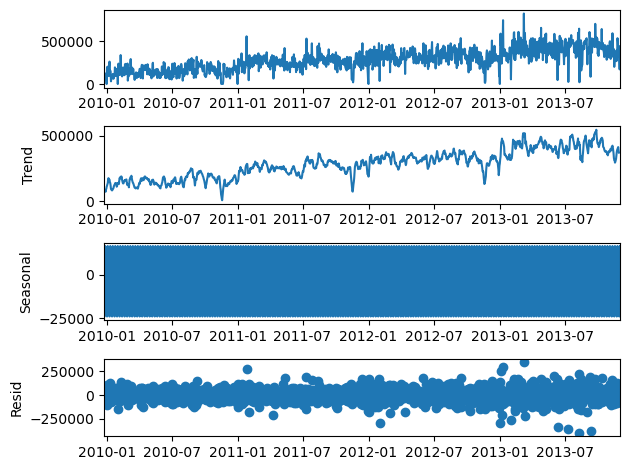

In [25]:
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()
pyplot.show()

In [26]:
test_df = df.iloc[-1]
train_df = df.iloc[:-1]

In [29]:
df.iloc[-1]

qty    423846.0
Name: 2013-12-02 00:00:00, dtype: float64

In [27]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level = alpha, optimized = False)
exp_pred = model.forecast(1)
exp_pred

/Users/egor/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2013-12-02    225015.522647
Freq: D, dtype: float64

In [30]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_df)

adf:  -2.255302641033781
p-value:  0.186789031234171
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
есть единичные корни, ряд не стационарен


In [31]:
df_diff_1 = df.diff().dropna()

In [32]:
stat_test(df_diff_1)

adf:  -13.821839865226535
p-value:  7.878856681053815e-26
Critical values:  {'1%': -3.4349700122033804, '5%': -2.8635804131233096, '10%': -2.567856305330816}
единичных корней нет, ряд стационарен


In [33]:
df_diff_1

,qty
date,
2009-12-26,-5728.0
2009-12-27,58613.0
2009-12-28,-33655.0
2009-12-29,-14549.0
2009-12-30,20294.0
...,...
2013-11-28,-95158.0
2013-11-29,123699.0
2013-11-30,-120839.0


/Users/egor/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


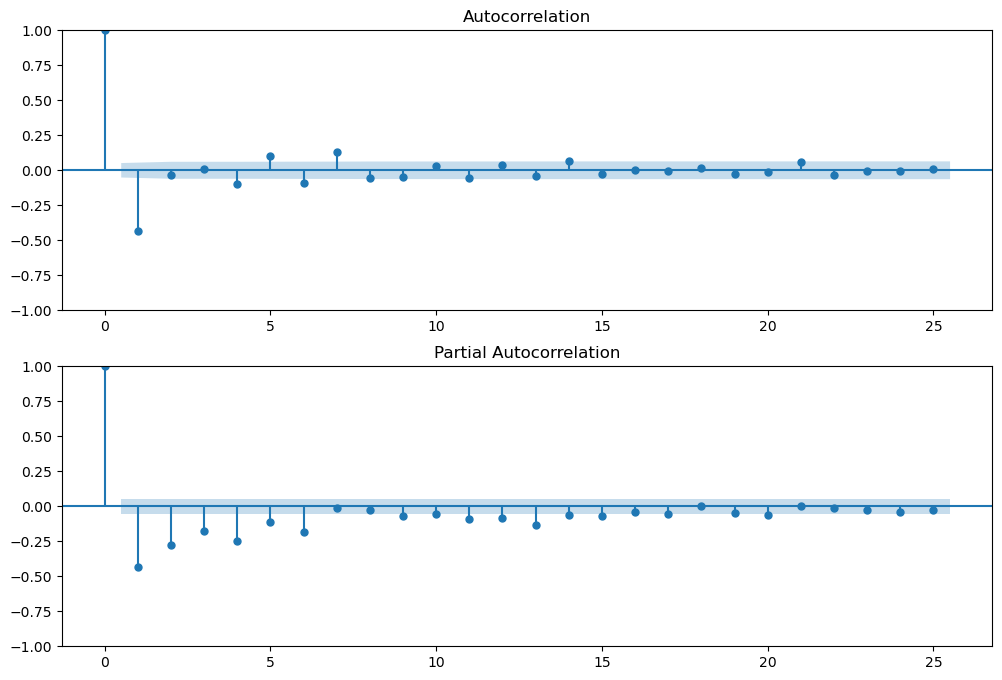

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff_1.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff_1, lags=25, ax=ax2)

In [38]:
p=6

In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train_df, lags=p).fit()
print(ar_model.summary())

ar_pred = ar_model.predict(start=len(train_df), end=(len(train_df)), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(6)   Log Likelihood              -18221.056
Method:               Conditional MLE   S.D. of innovations          81248.064
Date:                Tue, 18 Jul 2023   AIC                          36458.111
Time:                        18:06:20   BIC                          36500.246
Sample:                    12-31-2009   HQIC                         36473.844
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.047e+04   6160.175      4.946      0.000    1.84e+04    4.25e+04
qty.L1         0.3074      0.026     11.654      0.000       0.256       0.359
qty.L2         0.1582      0.027      5.835      0.0

/Users/egor/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/egor/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2013-12-02    318174.284553
Freq: D, dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_df, ar_pred), mean_squared_error(test_df, exp_pred)

(11166511445.47285, 39533558724.37031)